In [7]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mohankrishnathalla/diabetes-health-indicators-dataset")

print("Path to dataset files:", path)

100%|██████████████████████████████████████████████████████████████████████████████| 3.75M/3.75M [00:11<00:00, 348kB/s]

Extracting files...
Path to dataset files: C:\Users\sam\.cache\kagglehub\datasets\mohankrishnathalla\diabetes-health-indicators-dataset\versions\1


In [22]:
import pandas as pd
import numpy as np


In [23]:
dib_df = pd.read_csv('C:\\Users\\sam\\.cache\\kagglehub\\datasets\\mohankrishnathalla\\diabetes-health-indicators-dataset\\versions\\1\\diabetes_dataset.csv')

In [24]:
dib_df

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,50,79,140,139,253,5.28,9.03,38.2,Type 2,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,52,125,160,137,184,12.74,7.20,23.5,Type 2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,46,Male,Other,Graduate,Upper-Middle,Unemployed,Former,1,136,8.3,...,45,150,116,113,109,14.58,5.55,26.0,Pre-Diabetes,0
99996,41,Female,White,Graduate,Middle,Employed,Never,3,76,8.8,...,55,123,146,96,146,9.02,5.97,24.4,Pre-Diabetes,0
99997,57,Female,Black,No formal,Upper-Middle,Employed,Former,4,121,9.9,...,50,111,184,93,132,2.57,5.21,27.6,No Diabetes,0
99998,47,Female,Black,Highschool,Lower-Middle,Retired,Never,3,52,5.9,...,68,91,116,106,117,9.81,5.53,26.4,Pre-Diabetes,0


In [25]:
dib_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 100000 non-null  int64  
 1   gender                              100000 non-null  object 
 2   ethnicity                           100000 non-null  object 
 3   education_level                     100000 non-null  object 
 4   income_level                        100000 non-null  object 
 5   employment_status                   100000 non-null  object 
 6   smoking_status                      100000 non-null  object 
 7   alcohol_consumption_per_week        100000 non-null  int64  
 8   physical_activity_minutes_per_week  100000 non-null  int64  
 9   diet_score                          100000 non-null  float64
 10  sleep_hours_per_day                 100000 non-null  float64
 11  screen_time_hours_per_day  

In [26]:
dib_df[['hba1c']].var()

hba1c    0.662467
dtype: float64

In [27]:
obj_col = [i for i in dib_df.columns if dib_df[i].dtype == 'object']
num_col = [i for i in dib_df.columns if dib_df[i].dtype in ('int64','float64')]

# Numerical columns 

In [28]:
num_col

['age',
 'alcohol_consumption_per_week',
 'physical_activity_minutes_per_week',
 'diet_score',
 'sleep_hours_per_day',
 'screen_time_hours_per_day',
 'family_history_diabetes',
 'hypertension_history',
 'cardiovascular_history',
 'bmi',
 'waist_to_hip_ratio',
 'systolic_bp',
 'diastolic_bp',
 'heart_rate',
 'cholesterol_total',
 'hdl_cholesterol',
 'ldl_cholesterol',
 'triglycerides',
 'glucose_fasting',
 'glucose_postprandial',
 'insulin_level',
 'hba1c',
 'diabetes_risk_score',
 'diagnosed_diabetes']

# Object Columns

In [29]:
obj_col

['gender',
 'ethnicity',
 'education_level',
 'income_level',
 'employment_status',
 'smoking_status',
 'diabetes_stage']

## Drop the irrevalant columns

#### education_level → indirect

#### income_level → indirect

#### employment_status → indirect

In [30]:
dib_df = dib_df.drop(columns=['education_level','income_level','employment_status'],axis=1)
dib_df.head()

,age,gender,ethnicity,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Never,0,215,5.7,7.9,7.9,0,...,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,48,Female,White,Former,1,143,6.7,6.5,8.7,0,...,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0
2,60,Male,Hispanic,Never,1,57,6.4,10.0,8.1,1,...,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
3,74,Female,Black,Never,0,49,3.4,6.6,5.2,0,...,50,79,140,139,253,5.28,9.03,38.2,Type 2,1
4,46,Male,White,Never,1,109,7.2,7.4,5.0,0,...,52,125,160,137,184,12.74,7.20,23.5,Type 2,1


In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='diabetes_risk_score', ylabel='Density'>

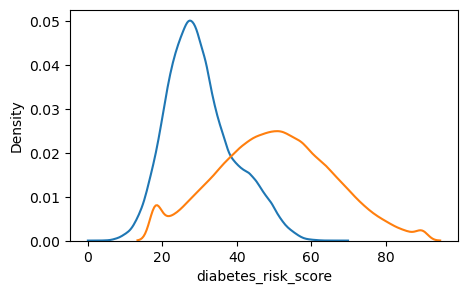

In [32]:
plt.figure(figsize=(5,3))
sns.kdeplot(dib_df.diabetes_risk_score)
sns.kdeplot(dib_df.age)


In [33]:
dib_df[dib_df['diagnosed_diabetes']==0].diabetes_stage.unique()

array(['No Diabetes', 'Pre-Diabetes', 'Type 1', 'Gestational'],
      dtype=object)

In [34]:
dib_df[dib_df['diagnosed_diabetes']==1].diabetes_stage.unique()

array(['Type 2', 'Gestational', 'Type 1'], dtype=object)

In [35]:
pd.crosstab(dib_df['diabetes_stage'], dib_df['diagnosed_diabetes'])


diagnosed_diabetes,0,1
diabetes_stage,,
Gestational,120,158
No Diabetes,7981,0
Pre-Diabetes,31845,0
Type 1,56,66
Type 2,0,59774


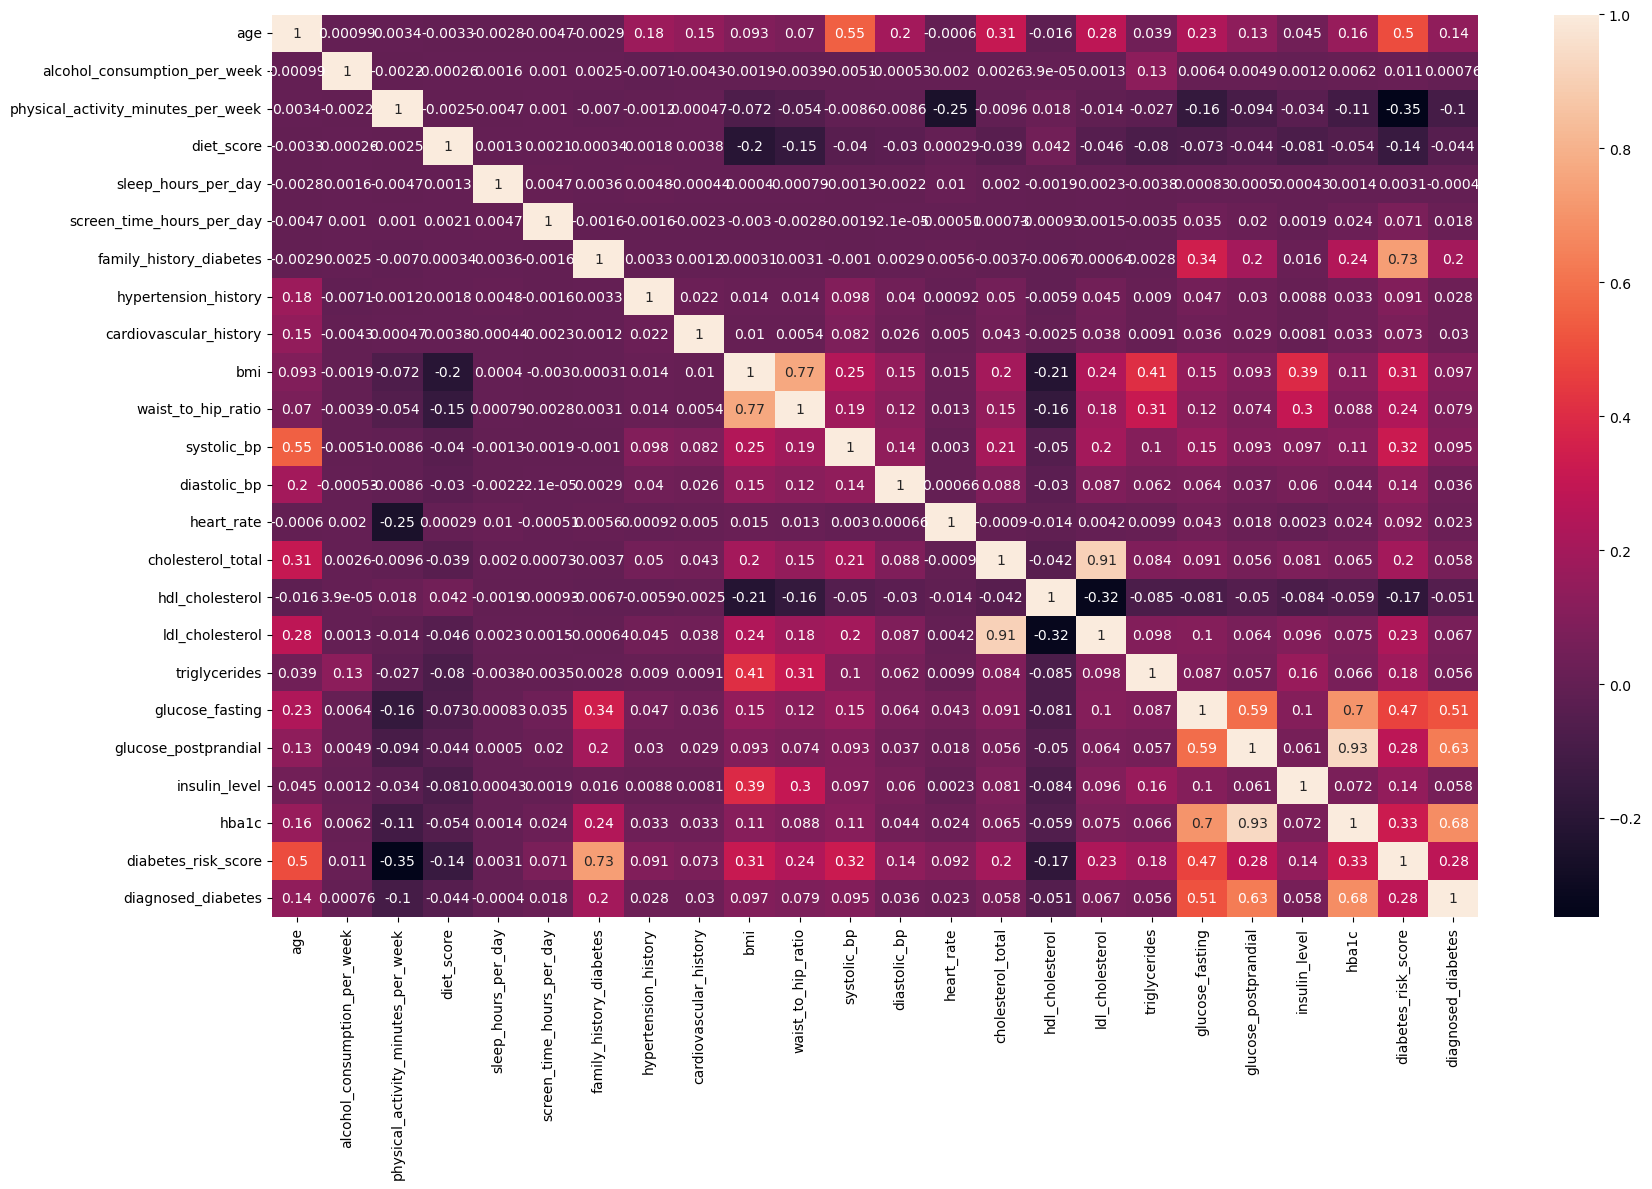

In [36]:
plt.figure(figsize=(18,12))
sns.heatmap(dib_df[num_col].corr(),annot=True)
plt.tight_layout()
plt.show()

## shows redundency and drop the column 

In [37]:
dib_df = dib_df.drop(columns=['cardiovascular_history', 'sleep_hours_per_day', 'hypertension_history'],axis=1)

In [38]:
len(dib_df.columns)

25

# Distribution of the data 

In [47]:
dib_df.head()

,age,gender,ethnicity,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,screen_time_hours_per_day,family_history_diabetes,bmi,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Never,0.000000,5.375278,5.7,7.9,0,30.5,...,41,5.081404,4.983607,136,5.468060,1.996060,8.18,3.421000,Type 2,1
1,48,Female,White,Former,0.693147,4.969813,6.7,8.7,0,23.1,...,55,3.931826,3.433987,93,5.017280,1.098612,5.63,3.178054,No Diabetes,0
2,60,Male,Hispanic,Never,0.693147,4.060443,6.4,8.1,1,22.2,...,66,4.605170,3.610918,118,5.278115,1.803359,7.51,3.822098,Type 2,1
3,74,Female,Black,Never,0.000000,3.912023,3.4,5.2,0,26.8,...,50,4.382027,4.948760,139,5.537334,1.837370,9.03,3.668677,Type 2,1
4,46,Male,White,Never,0.693147,4.700480,7.2,5.0,0,21.2,...,52,4.836282,5.081404,137,5.220356,2.620311,7.20,3.198673,Type 2,1


## Checking the Correlation the Columns 

In [40]:
dib_df[['cholesterol_total','hdl_cholesterol','ldl_cholesterol']].corr()

,cholesterol_total,hdl_cholesterol,ldl_cholesterol
cholesterol_total,1.000000,-0.042077,0.906132
hdl_cholesterol,-0.042077,1.000000,-0.323713
ldl_cholesterol,0.906132,-0.323713,1.000000


### Since 3 cholestrol are having Correlation we will drop One of the Columns 

In [56]:
dib_df.drop(columns=['cholesterol_total'],inplace=True)

# Checking the Balance of the Data 

#### our Data is Slighty imbalanced

<Axes: xlabel='diagnosed_diabetes'>

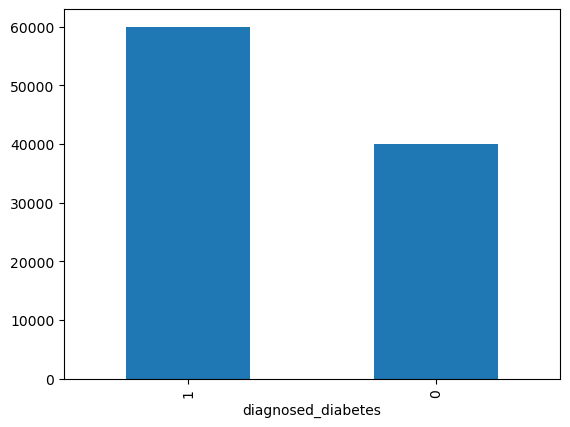

In [57]:
dib_df.diagnosed_diabetes.value_counts().plot.bar()

In [58]:
df3 = dib_df.copy()
df3.head()

,age,gender,ethnicity,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,screen_time_hours_per_day,family_history_diabetes,bmi,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Never,0,215,5.7,7.9,0,30.5,...,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,48,Female,White,Former,1,143,6.7,8.7,0,23.1,...,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0
2,60,Male,Hispanic,Never,1,57,6.4,8.1,1,22.2,...,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
3,74,Female,Black,Never,0,49,3.4,5.2,0,26.8,...,50,79,140,139,253,5.28,9.03,38.2,Type 2,1
4,46,Male,White,Never,1,109,7.2,5.0,0,21.2,...,52,125,160,137,184,12.74,7.20,23.5,Type 2,1


In [59]:
class Diabaities_pred:
    
    def __init__(self,x,):
        self.x  = x
        
    def len_columns(self):
        len_col =  len(self.x.columns)
        return len_col
    
    def ploting_visual(self,plot_):
        fig,axes = plt.subplots(4,6, figsize=(18, 12))
        
        axes = axes.flatten()
        for i , col in enumerate(self.x.columns):
            if col != 'diagnosed_diabetes':
                plot_(self.x[col],color='blue',ax=axes[i])
        
        plt.tight_layout()
        plt.show()

## Distribution Before Log Transformation of the data  

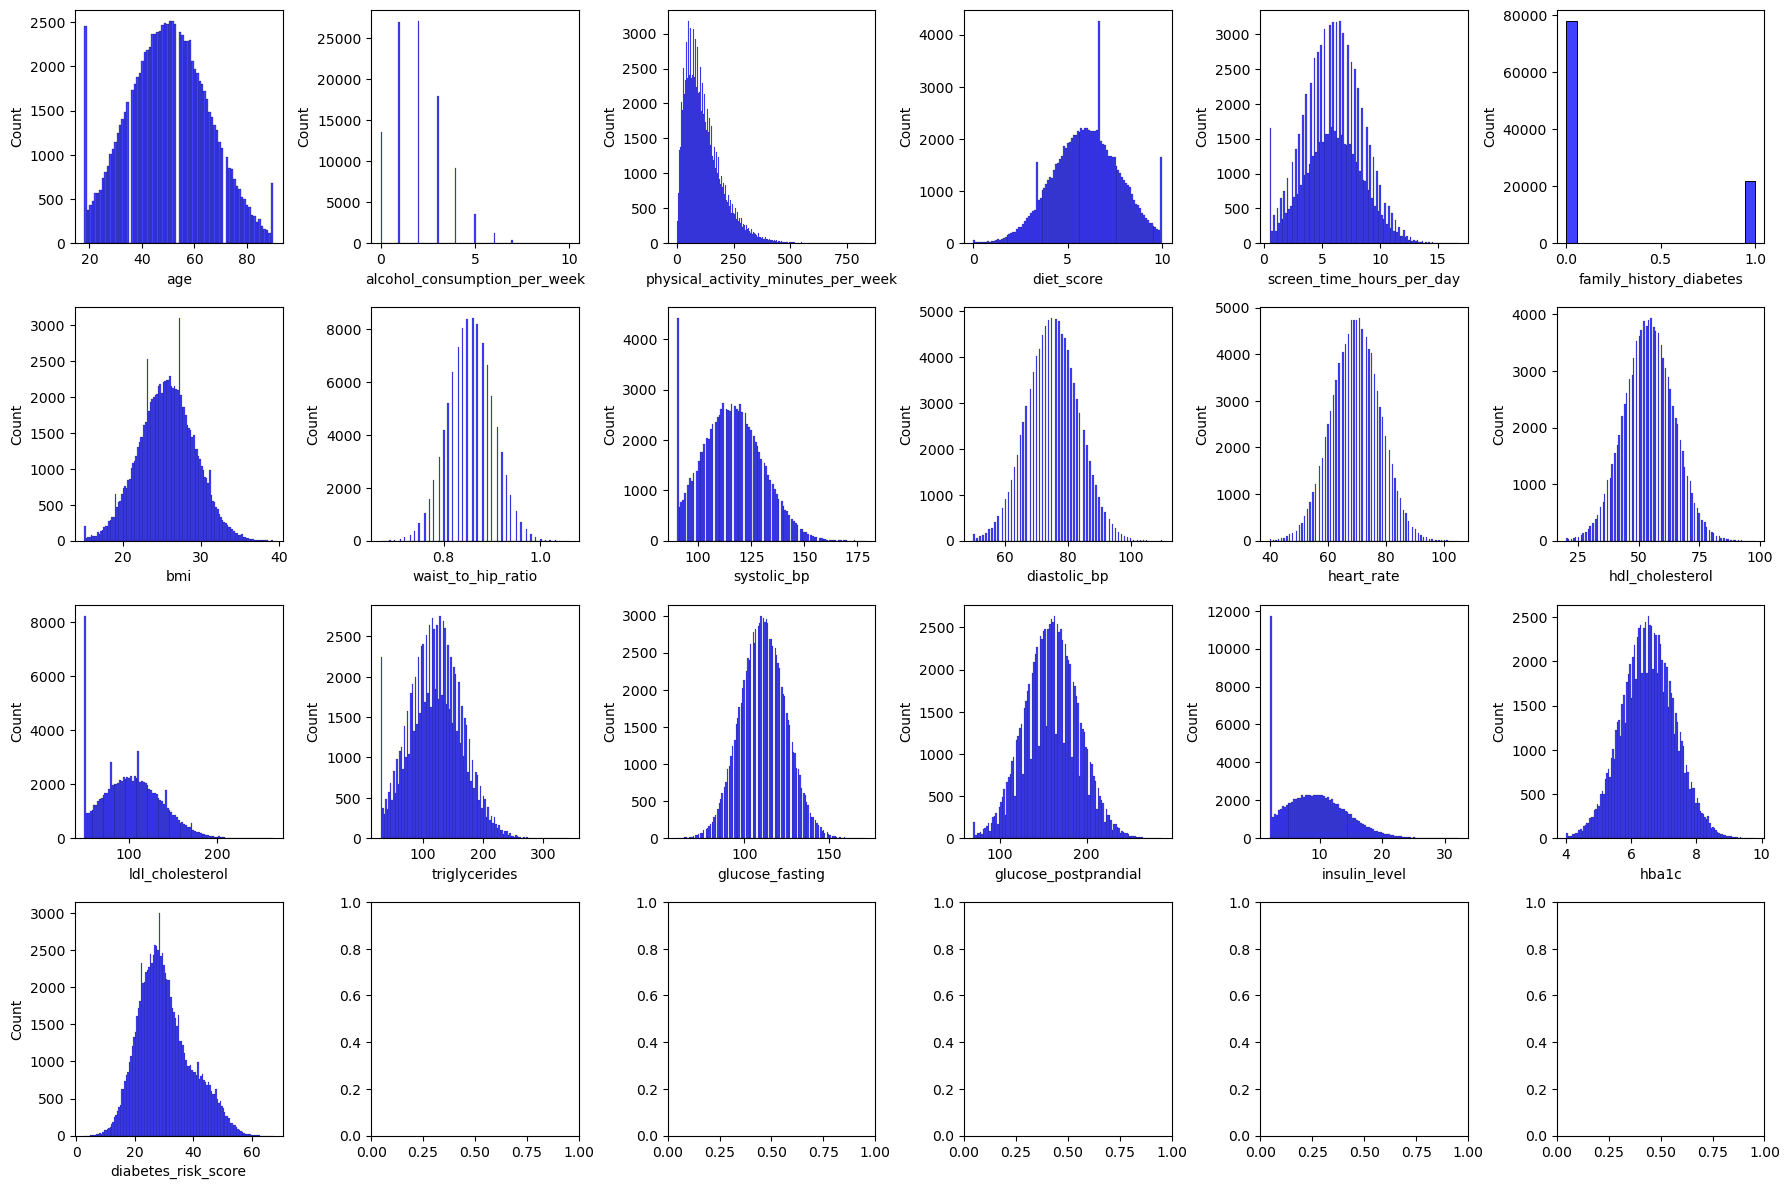

In [60]:
p0 = Diabaities_pred(df3.select_dtypes(include=['int64','float']))
p0.len_columns()
p0.ploting_visual(sns.histplot)

# Checking the Outliers

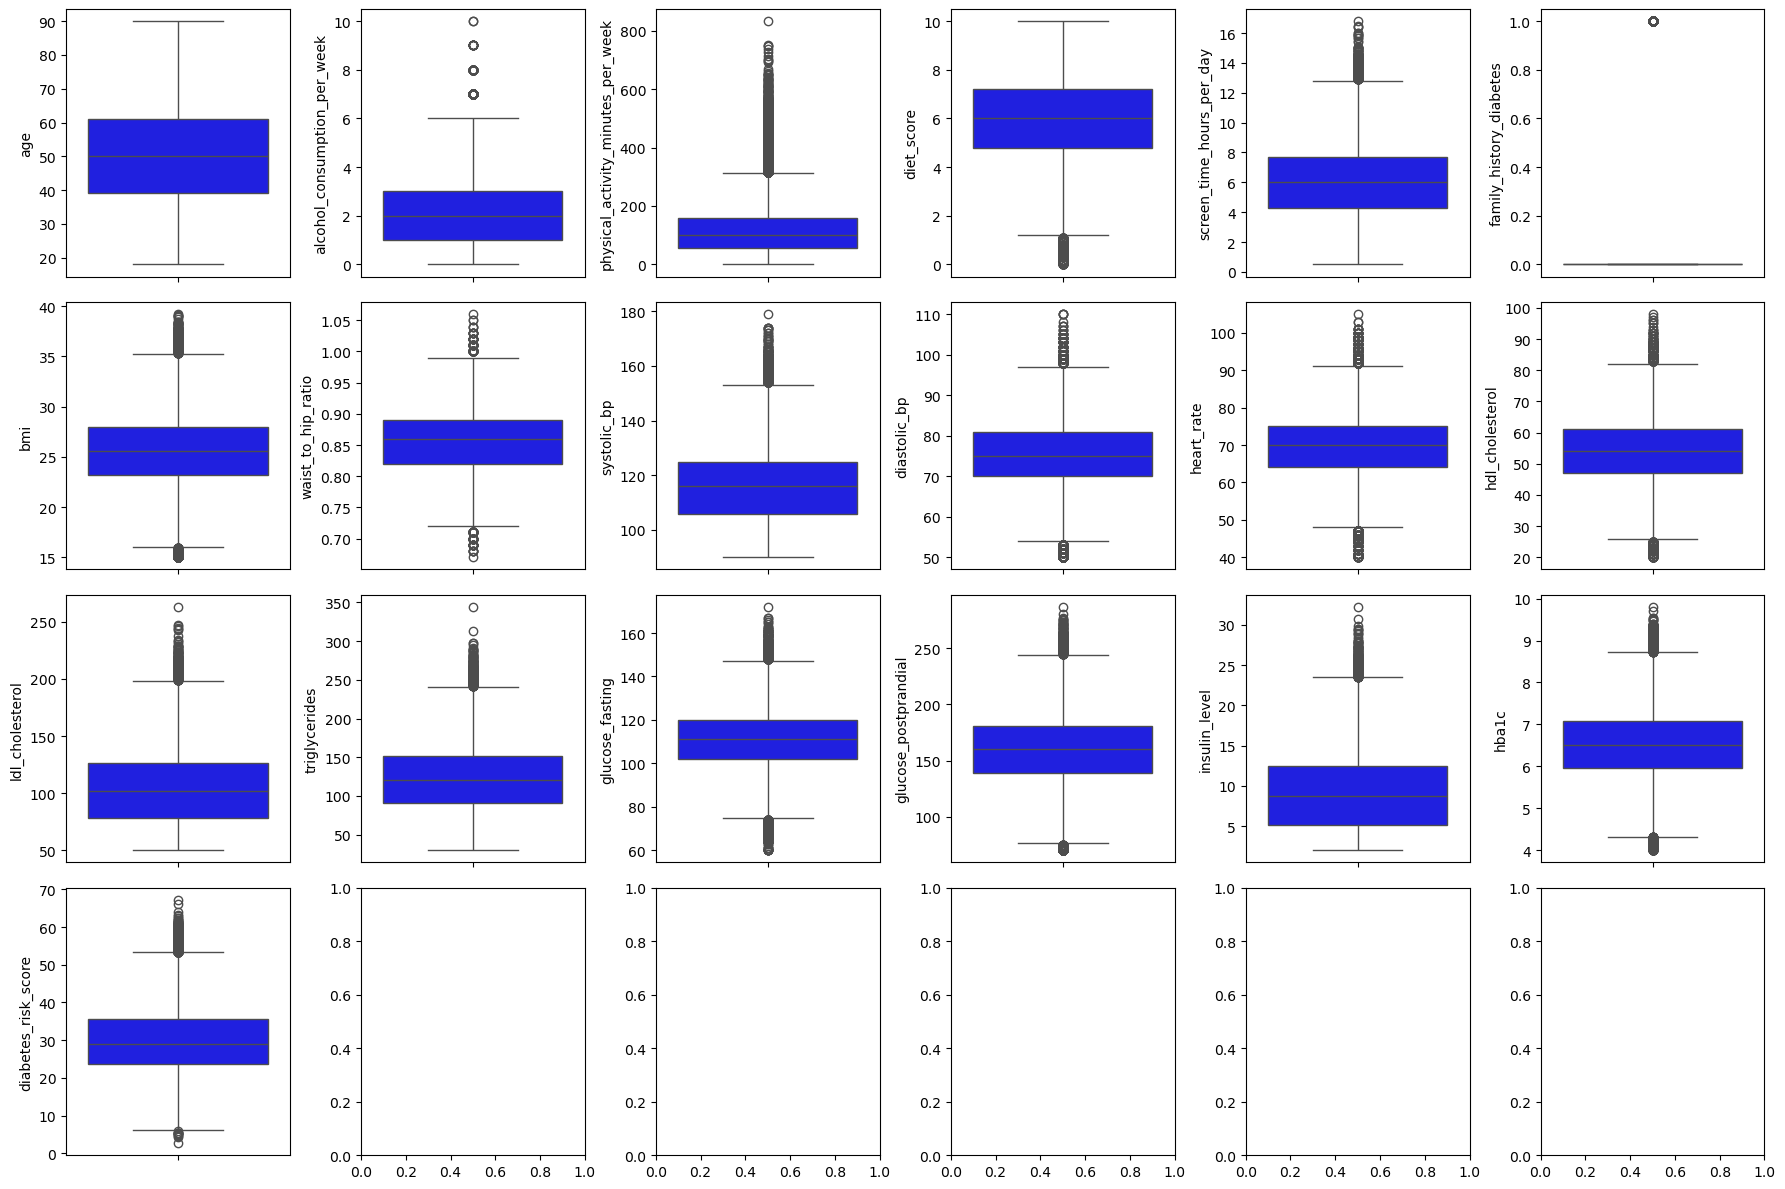

In [61]:
p1 = Diabaities_pred(df3.select_dtypes(include=['int64','float']))
p1.len_columns()
p1.ploting_visual(sns.boxplot)

In [46]:
df3 = dib_df.copy()

# Capping the Outliers in the data through IQR 

In [62]:
import numpy as np
import pandas as pd

# Assuming df3 is your dataframe

for col in df3.columns:
    if col != 'diagnosed_diabetes':
        if df3[col].dtype != 'object':
            Q1 = np.quantile(df3[col], 0.25)
            Q3 = np.quantile(df3[col], 0.75)
            IQR = Q3 - Q1

            # Define caps
            lower_cap = Q1 - 1.5 * IQR
            upper_cap = Q3 + 1.5 * IQR

            # Apply capping
            df3[col] = np.where(df3[col] < lower_cap, lower_cap,
                              np.where(df3[col] > upper_cap, upper_cap, df3[col]))

print(" IQR capping done successfully.")


 IQR capping done successfully.


# After capping the outliers

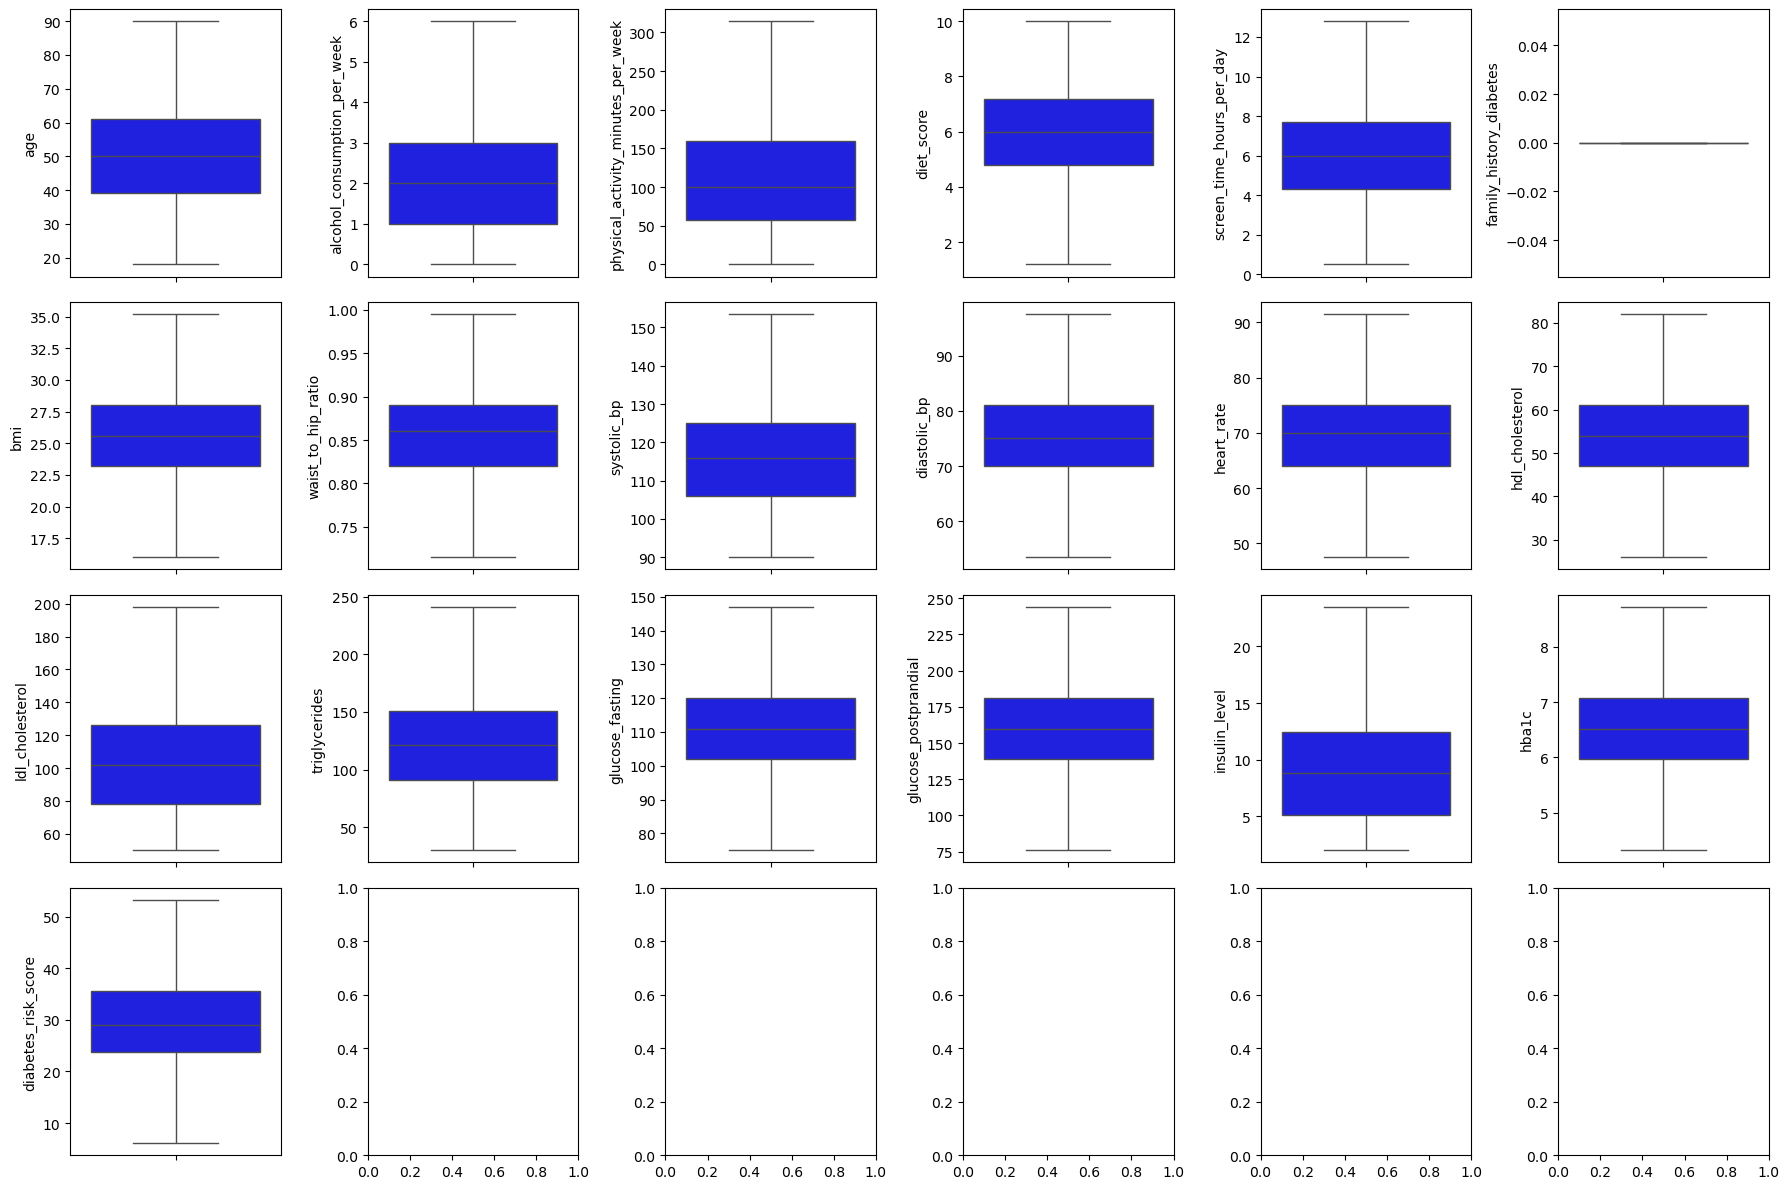

In [63]:
p3 = Diabaities_pred(df3.select_dtypes(include=['int64','float']))
p3.len_columns()
p3.ploting_visual(sns.boxplot)

# Features to log since they are Skewed

In [64]:

cols_to_log = [
    'alcohol_consumption_per_week',
    'physical_activity_minutes_per_week',
    'insulin_level',
    'ldl_cholesterol',
    'triglycerides',
    'glucose_postprandial',
    'diabetes_risk_score'
]

for col in cols_to_log:
    df3[col] = np.log1p(df3[col])  # log1p handles zero safely



In [65]:
p2 = Diabaities_pred(df3.select_dtypes(include=['int64','float']))
p2.len_columns()

20

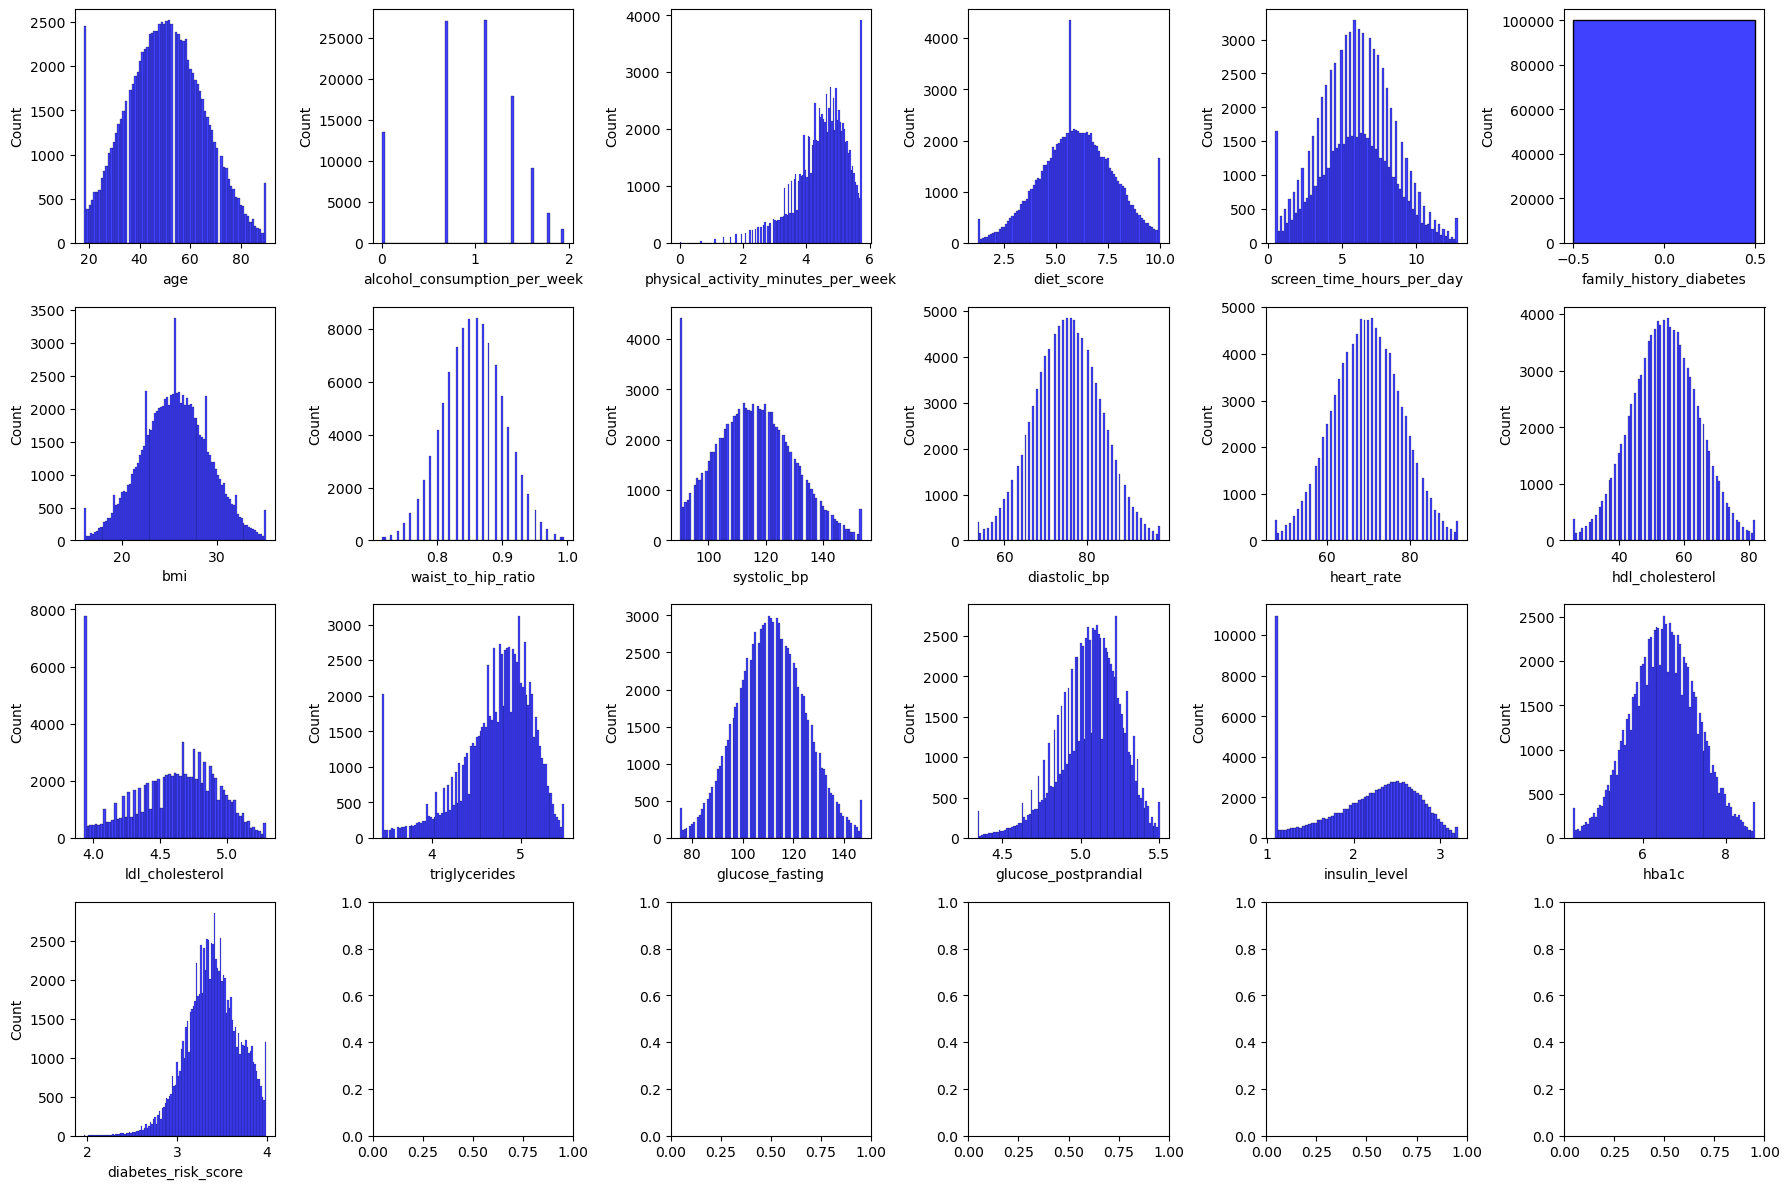

In [66]:
p2.ploting_visual(sns.histplot)

In [67]:
df3.head()

,age,gender,ethnicity,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,screen_time_hours_per_day,family_history_diabetes,bmi,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58.0,Male,Asian,Never,0.000000,5.375278,5.7,7.9,0.0,30.5,...,41.0,5.081404,4.983607,136.0,5.468060,1.996060,8.18,3.421000,Type 2,1
1,48.0,Female,White,Former,0.693147,4.969813,6.7,8.7,0.0,23.1,...,55.0,3.931826,3.433987,93.0,5.017280,1.098612,5.63,3.178054,No Diabetes,0
2,60.0,Male,Hispanic,Never,0.693147,4.060443,6.4,8.1,0.0,22.2,...,66.0,4.605170,3.610918,118.0,5.278115,1.803359,7.51,3.822098,Type 2,1
3,74.0,Female,Black,Never,0.000000,3.912023,3.4,5.2,0.0,26.8,...,50.0,4.382027,4.948760,139.0,5.501258,1.837370,8.72,3.668677,Type 2,1
4,46.0,Male,White,Never,0.693147,4.700480,7.2,5.0,0.0,21.2,...,52.0,4.836282,5.081404,137.0,5.220356,2.620311,7.20,3.198673,Type 2,1


## Training the MOdel

In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder ,LabelEncoder,OrdinalEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix , roc_curve ,auc
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import BaggingClassifier


    


In [69]:
df3.sample()

,age,gender,ethnicity,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,screen_time_hours_per_day,family_history_diabetes,bmi,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
48655,61.0,Female,Other,Current,1.386294,5.023881,6.9,3.8,0.0,24.3,...,51.0,4.330733,4.634729,115.0,5.187386,2.754934,7.14,3.317816,Type 2,1


In [93]:

class Diabities_Prediction_model:
    
    def __init__(self,data):
        self.data = data
        self.x = self.data.drop(columns=['diagnosed_diabetes','diabetes_stage'])
        self.y = self.data['diagnosed_diabetes']
        
    def train_test(self):
        self.X_train , self.X_test ,self.y_train ,self.y_test = train_test_split(self.x,self.y,test_size=0.2,random_state=42)
        return None
    
    def column_tranformer(self,user_model):
        
        categorical_cols = ['gender', 'ethnicity']
        ordinal_cols = ['smoking_status']
        Standard_scaler_cols = [i for i in self.x.columns
                                if self.x[i].dtype in ['int64', 'float64'] and i != 'family_history_diabetes']
        
       # Define encoders
        onehot_encoder = OneHotEncoder(drop='first', sparse_output=False)
        ordinal_encoder = OrdinalEncoder(categories=[['Never', 'Former', 'Current']])
    
    # Build column transformer
        pre_processor = ColumnTransformer(
        transformers=[
            ('cat', onehot_encoder, categorical_cols),
            ('ordinal_col', ordinal_encoder, ordinal_cols),
            ('standard',StandardScaler(),Standard_scaler_cols)
        ],
        remainder='passthrough'
    )
        
        model = Pipeline([
        ('pre', pre_processor),
        ('classifier', user_model)
    ])
    
    # Fit the pipeline
        model.fit(self.X_train, self.y_train)
        print(str(user_model), "fitted successfully")
    
    # Save model
        self.model = model
        
    def evalulate_model(self):
        
        y_pred  = self.model.predict(self.X_test)
        print("\n Accuracy:", accuracy_score(self.y_test, y_pred))
        print("\nTraining Score:",self.model.score(self.X_train,self.y_train))
        print("Test Score:",self.model.score(self.X_test,self.y_test))
        print("\nClassification Report:\n", classification_report(self.y_test, y_pred))
        print("\nConfusion Matrix:\n", confusion_matrix(self.y_test, y_pred))
    
    
    def Plot_roc_auc(self):
        
        y_pred_prob = self.model.predict_proba(self.X_test)[:, 1]

        # Compute ROC curve
        fpr, tpr, thresholds = roc_curve(self.y_test, y_pred_prob)
        roc_auc = auc(fpr, tpr)

        
        plt.figure(figsize=(6, 6))
        plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='red', linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        
        
    

## Logistic regression

In [94]:
model1 = Diabities_Prediction_model(df3)
model1.train_test()
model1.column_tranformer(LogisticRegression(class_weight='balanced'))
model1.evalulate_model()


LogisticRegression(class_weight='balanced') fitted successfully

 Accuracy: 0.8837

Training Score: 0.88595
Test Score: 0.8837

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      8077
           1       0.93      0.87      0.90     11923

    accuracy                           0.88     20000
   macro avg       0.88      0.89      0.88     20000
weighted avg       0.89      0.88      0.88     20000


Confusion Matrix:
 [[ 7262   815]
 [ 1511 10412]]


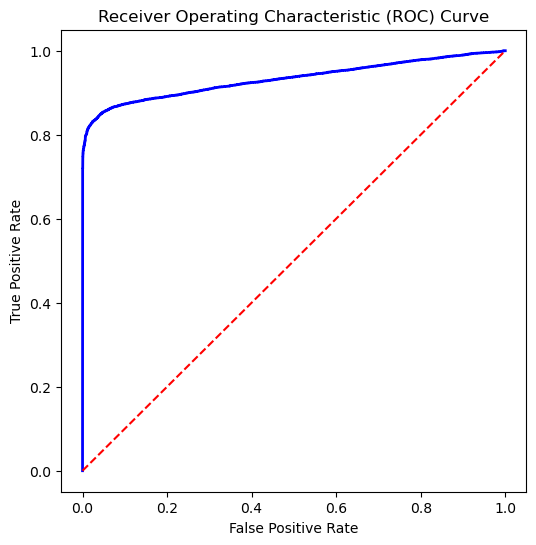

In [95]:
model1.Plot_roc_auc()

## Decision Tree

DecisionTreeClassifier(class_weight='balanced', max_depth=6, random_state=42) fitted successfully

 Accuracy: 0.92015

Training Score: 0.9214625
Test Score: 0.92015

Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      8077
           1       1.00      0.87      0.93     11923

    accuracy                           0.92     20000
   macro avg       0.92      0.93      0.92     20000
weighted avg       0.93      0.92      0.92     20000


Confusion Matrix:
 [[ 8074     3]
 [ 1594 10329]]


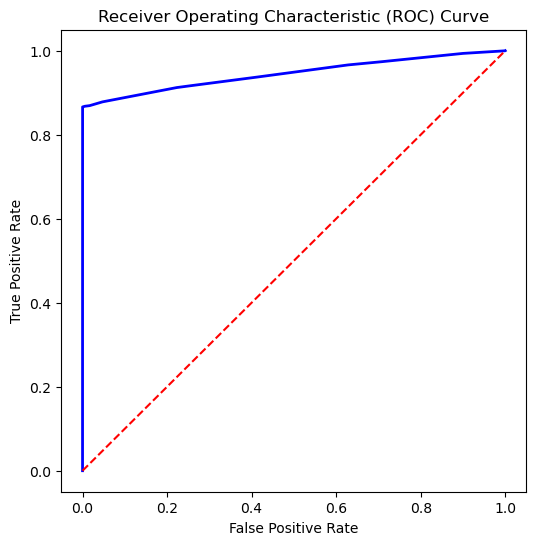

In [96]:
model2 = Diabities_Prediction_model(df3)
model2.train_test()
model2.column_tranformer(DecisionTreeClassifier(class_weight='balanced',max_depth=6,random_state=42))
model2.evalulate_model()
model2.Plot_roc_auc()

## Random Forest Classifier

In [97]:
model3 = Diabities_Prediction_model(df3)
model3.train_test()
model3.column_tranformer(RandomForestClassifier(class_weight='balanced',n_estimators=200,n_jobs=-1))
model3.evalulate_model()

RandomForestClassifier(class_weight='balanced', n_estimators=200, n_jobs=-1) fitted successfully

 Accuracy: 0.9202

Training Score: 1.0
Test Score: 0.9202

Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      8077
           1       1.00      0.87      0.93     11923

    accuracy                           0.92     20000
   macro avg       0.92      0.93      0.92     20000
weighted avg       0.93      0.92      0.92     20000


Confusion Matrix:
 [[ 8077     0]
 [ 1596 10327]]


## Baggaing Classifer

In [98]:
model4 = Diabities_Prediction_model(df3)
model4.train_test()
model4.column_tranformer(BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42,max_depth=5),
                                           n_estimators=70,n_jobs=-1,max_samples=0.8,bootstrap=True))
model4.evalulate_model()

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=5,
                                                   random_state=42),
                  max_samples=0.8, n_estimators=70, n_jobs=-1) fitted successfully

 Accuracy: 0.9202

Training Score: 0.9213125
Test Score: 0.9202

Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      8077
           1       1.00      0.87      0.93     11923

    accuracy                           0.92     20000
   macro avg       0.92      0.93      0.92     20000
weighted avg       0.93      0.92      0.92     20000


Confusion Matrix:
 [[ 8077     0]
 [ 1596 10327]]


In [44]:
from sklearn.feature_selection import mutual_info_classif

X = dib_df_num_col.drop(columns=['diagnosed_diabetes'])
y = dib_df_num_col['diagnosed_diabetes']

mi_scores = mutual_info_classif(X, y, discrete_features='auto')
mi_scores = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)
print(mi_scores)


hba1c                                 0.442328
glucose_postprandial                  0.287524
glucose_fasting                       0.165282
diabetes_risk_score                   0.038096
family_history_diabetes               0.022704
age                                   0.011584
waist_to_hip_ratio                    0.006873
bmi                                   0.004695
physical_activity_minutes_per_week    0.004594
systolic_bp                           0.004339
ldl_cholesterol                       0.003400
heart_rate                            0.002662
triglycerides                         0.002566
alcohol_consumption_per_week          0.002558
cholesterol_total                     0.001778
diet_score                            0.001055
diastolic_bp                          0.000729
hypertension_history                  0.000537
screen_time_hours_per_day             0.000346
hdl_cholesterol                       0.000201
insulin_level                         0.000069
sleep_hours_p

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importances)


# Performing Feature selection Using Recursive Feature Elimination (RFE) 

## Selecting the Top 10 columns and Checking the Performance and Comparing the Performance of the model with the Pervious Trained Decsion tree Algorthim 

In [148]:
df3_new = df3.drop(columns=['diabetes_stage'])
df3_new.sample(5)
df3_new['family_history_diabetes']

,age,gender,ethnicity,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,screen_time_hours_per_day,family_history_diabetes,bmi,...,heart_rate,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diagnosed_diabetes
82473,52.0,Male,Black,Current,1.386294,4.779123,7.6,9.1,0.0,19.0,...,76.0,49.0,4.394449,4.852030,91.0,5.023881,2.298577,6.05,3.246491,0
53196,53.0,Female,White,Former,0.693147,4.110874,5.8,6.6,0.0,28.1,...,73.0,59.0,4.127134,4.653960,95.0,4.663439,1.098612,5.07,3.433987,0
79265,68.0,Female,Hispanic,Never,0.693147,4.709530,8.2,2.9,0.0,25.8,...,60.0,69.0,4.521789,5.099866,118.0,5.293305,2.743417,7.58,3.421000,1
33167,46.0,Female,Other,Former,1.098612,5.493061,7.3,1.1,0.0,24.0,...,58.0,64.0,4.204693,4.976734,99.0,5.099866,1.098612,6.31,2.895912,0
60959,32.0,Other,Asian,Current,0.693147,4.174387,5.0,5.0,0.0,24.8,...,85.0,50.0,4.454347,4.804021,111.0,5.141664,1.958685,6.97,3.711130,1


In [188]:

# Step 1: Prepare data
df3_new = df3.drop(columns=['diabetes_stage'])
X = df3_new.drop(columns=['diagnosed_diabetes'])
y = df3_new['diagnosed_diabetes']

# Step 2: Setup preprocessing
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first', sparse_output=False), ['gender', 'ethnicity']),
    ('ord', OrdinalEncoder(categories=[['Never', 'Former', 'Current']]), ['smoking_status']),
    ('num', StandardScaler(), [col for col in X.columns if col not 
                               in ['gender', 'ethnicity', 'smoking_status','family_history_diabetes']])
],remainder='passthrough')


X_transformed = preprocessor.fit_transform(X)
feature_names = preprocessor.get_feature_names_out()
X_df = pd.DataFrame(X_transformed, columns=feature_names)

X_df

,cat__gender_Male,cat__gender_Other,cat__ethnicity_Black,cat__ethnicity_Hispanic,cat__ethnicity_Other,cat__ethnicity_White,ord__smoking_status,num__age,num__alcohol_consumption_per_week,num__physical_activity_minutes_per_week,...,num__heart_rate,num__hdl_cholesterol,num__ldl_cholesterol,num__triglycerides,num__glucose_fasting,num__glucose_postprandial,num__insulin_level,num__hba1c,num__diabetes_risk_score,remainder__family_history_diabetes
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.504956,-1.912646,1.097952,...,-0.196579,-1.277313,1.455760,0.606393,1.844871,2.025828,-0.300055,2.048892,0.077813,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.135884,-0.557286,0.581189,...,-0.316973,0.093938,-1.946512,-3.132083,-1.342532,-0.224111,-1.886269,-1.099132,-0.742624,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.633124,-0.557286,-0.577799,...,0.525786,1.171349,0.046306,-2.705236,0.510609,1.077770,-0.640649,1.221764,1.432334,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.530299,-1.912646,-0.766959,...,-0.196579,-0.395795,-0.614106,0.522324,2.067248,2.191526,-0.580535,2.715532,0.914225,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.264052,-0.557286,0.237925,...,-0.316973,-0.199902,0.730300,0.842331,1.918996,0.789484,0.803292,0.839063,-0.672992,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.0,0.0,0.0,0.0,1.0,0.0,1.0,-0.264052,-0.557286,0.517678,...,-0.798550,-0.885527,1.265978,0.072184,0.139981,-1.805323,1.025422,-1.197893,-0.344867,0.0
99996,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.584472,0.798074,-0.216655,...,-1.520915,0.093938,0.682946,0.622860,-1.120155,-0.358111,0.245251,-0.679395,-0.551162,0.0
99997,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.440872,1.234402,0.369887,...,-0.076185,-0.395795,0.381711,1.177553,-1.342532,-0.857649,-1.578811,-1.617630,-0.150452,0.0
99998,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.199968,0.798074,-0.692696,...,-1.400520,1.367242,-0.200469,0.072184,-0.378898,-1.454919,0.379382,-1.222584,-0.295204,0.0


In [208]:

X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=42, stratify=y)

# Step 5: RFE - Select top 10 features
rfe = RFE(DecisionTreeClassifier(max_depth=6, random_state=42), n_features_to_select=12)
rfe.fit(X_train, y_train)
selected_features = list(X_train.columns[rfe.support_])
print(f"Selected 10 features: {selected_features}")



Selected 10 features: ['num__age', 'num__physical_activity_minutes_per_week', 'num__diastolic_bp', 'num__hdl_cholesterol', 'num__ldl_cholesterol', 'num__triglycerides', 'num__glucose_fasting', 'num__glucose_postprandial', 'num__insulin_level', 'num__hba1c', 'num__diabetes_risk_score', 'remainder__family_history_diabetes']


In [209]:
df_10_features = X_df[selected_features].copy()
print("dataframe of Top 10 selected features:" ,{df_10_features.shape})
df_10_features.head()

dataframe of Top 10 selected features: {(100000, 12)}


,num__age,num__physical_activity_minutes_per_week,num__diastolic_bp,num__hdl_cholesterol,num__ldl_cholesterol,num__triglycerides,num__glucose_fasting,num__glucose_postprandial,num__insulin_level,num__hba1c,num__diabetes_risk_score,remainder__family_history_diabetes
0,0.504956,1.097952,0.339309,-1.277313,1.455760,0.606393,1.844871,2.025828,-0.300055,2.048892,0.077813,0.0
1,-0.135884,0.581189,0.094099,0.093938,-1.946512,-3.132083,-1.342532,-0.224111,-1.886269,-1.099132,-0.742624,0.0
2,0.633124,-0.577799,-0.273717,1.171349,0.046306,-2.705236,0.510609,1.077770,-0.640649,1.221764,1.432334,0.0
3,1.530299,-0.766959,2.178386,-0.395795,-0.614106,0.522324,2.067248,2.191526,-0.580535,2.715532,0.914225,0.0
4,-0.264052,0.237925,-1.009347,-0.199902,0.730300,0.842331,1.918996,0.789484,0.803292,0.839063,-0.672992,0.0


In [210]:
X_train = X_train[selected_features]
X_test = X_test[selected_features]

# Step 6: GridSearchCV
param_grid = {
    'max_depth': [3, 5, 6, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced']
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
print(f"\n✅ Best params: {grid.best_params_}")
print(f"✅ Test Accuracy: {best_model.score(X_test, y_test):.2%}")

# Step 7: Cross validation
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5)
print(f"✅ CV Score: {cv_scores.mean():.2%} ± {cv_scores.std():.2%}")



✅ Best params: {'class_weight': 'balanced', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
✅ Test Accuracy: 91.99%
✅ CV Score: 92.14% ± 0.12%


In [211]:
dr1 = DecisionTreeClassifier(class_weight='balanced',max_depth=3,min_samples_leaf=1,min_samples_split=2)
dr1.fit(X_train,y_train)
dr1.score(X_train,y_train),dr1.score(X_test,y_test)

(0.9213875, 0.9199)

### So there is no Bog Difference compared to old MOdel with_out feature selection both the model have similar score , that means our RFE method is working and we have reduced the columns to 10 